### `Important Libraries`

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

### `Loading the Dataset`

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/saikatsam11/AIT-511-ML-Project-2/main/Project-2/train_dataset.csv')

### `Categorical and Numerical Variables`

In [5]:
categorical = ['hearing(left)', 'hearing(right)','Urine protein','dental caries','smoking']
numerical = ['age','height(cm)','weight(kg)','waist(cm)','eyesight(left)','eyesight(right)','systolic','relaxation'
             ,'fasting blood sugar','Cholesterol','triglyceride','HDL','LDL','hemoglobin','serum creatinine','AST','ALT'
             ,'Gtp']

In [6]:
data.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [7]:
data.dtypes

age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
Urine protein            int64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dental caries            int64
smoking                  int64
dtype: object

In [8]:
data.isna().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

### `Numerical Data Description`

In [9]:
data[numerical].describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,121.475631,75.994408,99.342269,196.883491,126.749461,57.293146,115.081495,14.624264,0.886030,26.198235,27.145188,39.905038
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,13.643521,9.658734,20.642741,36.353945,71.803143,14.617822,42.883163,1.566528,0.220621,19.175595,31.309945,49.693843
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,71.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,0.100000,6.000000,1.000000,2.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,91.000000,13.600000,0.800000,19.000000,15.000000,17.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,0.900000,23.000000,21.000000,26.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,130.000000,82.000000,104.000000,219.000000,160.000000,66.000000,136.000000,15.800000,1.000000,29.000000,31.000000,44.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,233.000000,146.000000,423.000000,445.000000,999.000000,359.000000,1860.000000,21.100000,11.600000,1090.000000,2914.000000,999.000000


### `Categorical Data Description`

In [10]:
data[categorical].nunique()

hearing(left)     2
hearing(right)    2
Urine protein     6
dental caries     2
smoking           2
dtype: int64

### `Target Distribution`

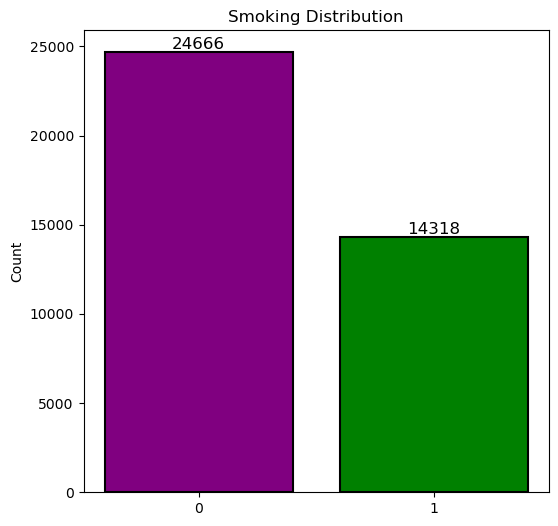

In [11]:
counts = data['smoking'].value_counts()
colors = ['purple', 'green']

plt.figure(figsize=(6,6))
bars = plt.bar(counts.index.astype(str), counts.values, color=colors,edgecolor='black',linewidth=1.5)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(height),ha='center', va='bottom', fontsize=12)
plt.ylabel("Count")
plt.title("Smoking Distribution")
plt.xticks(rotation=0)
plt.show()

### `Numerical Features Distribution`

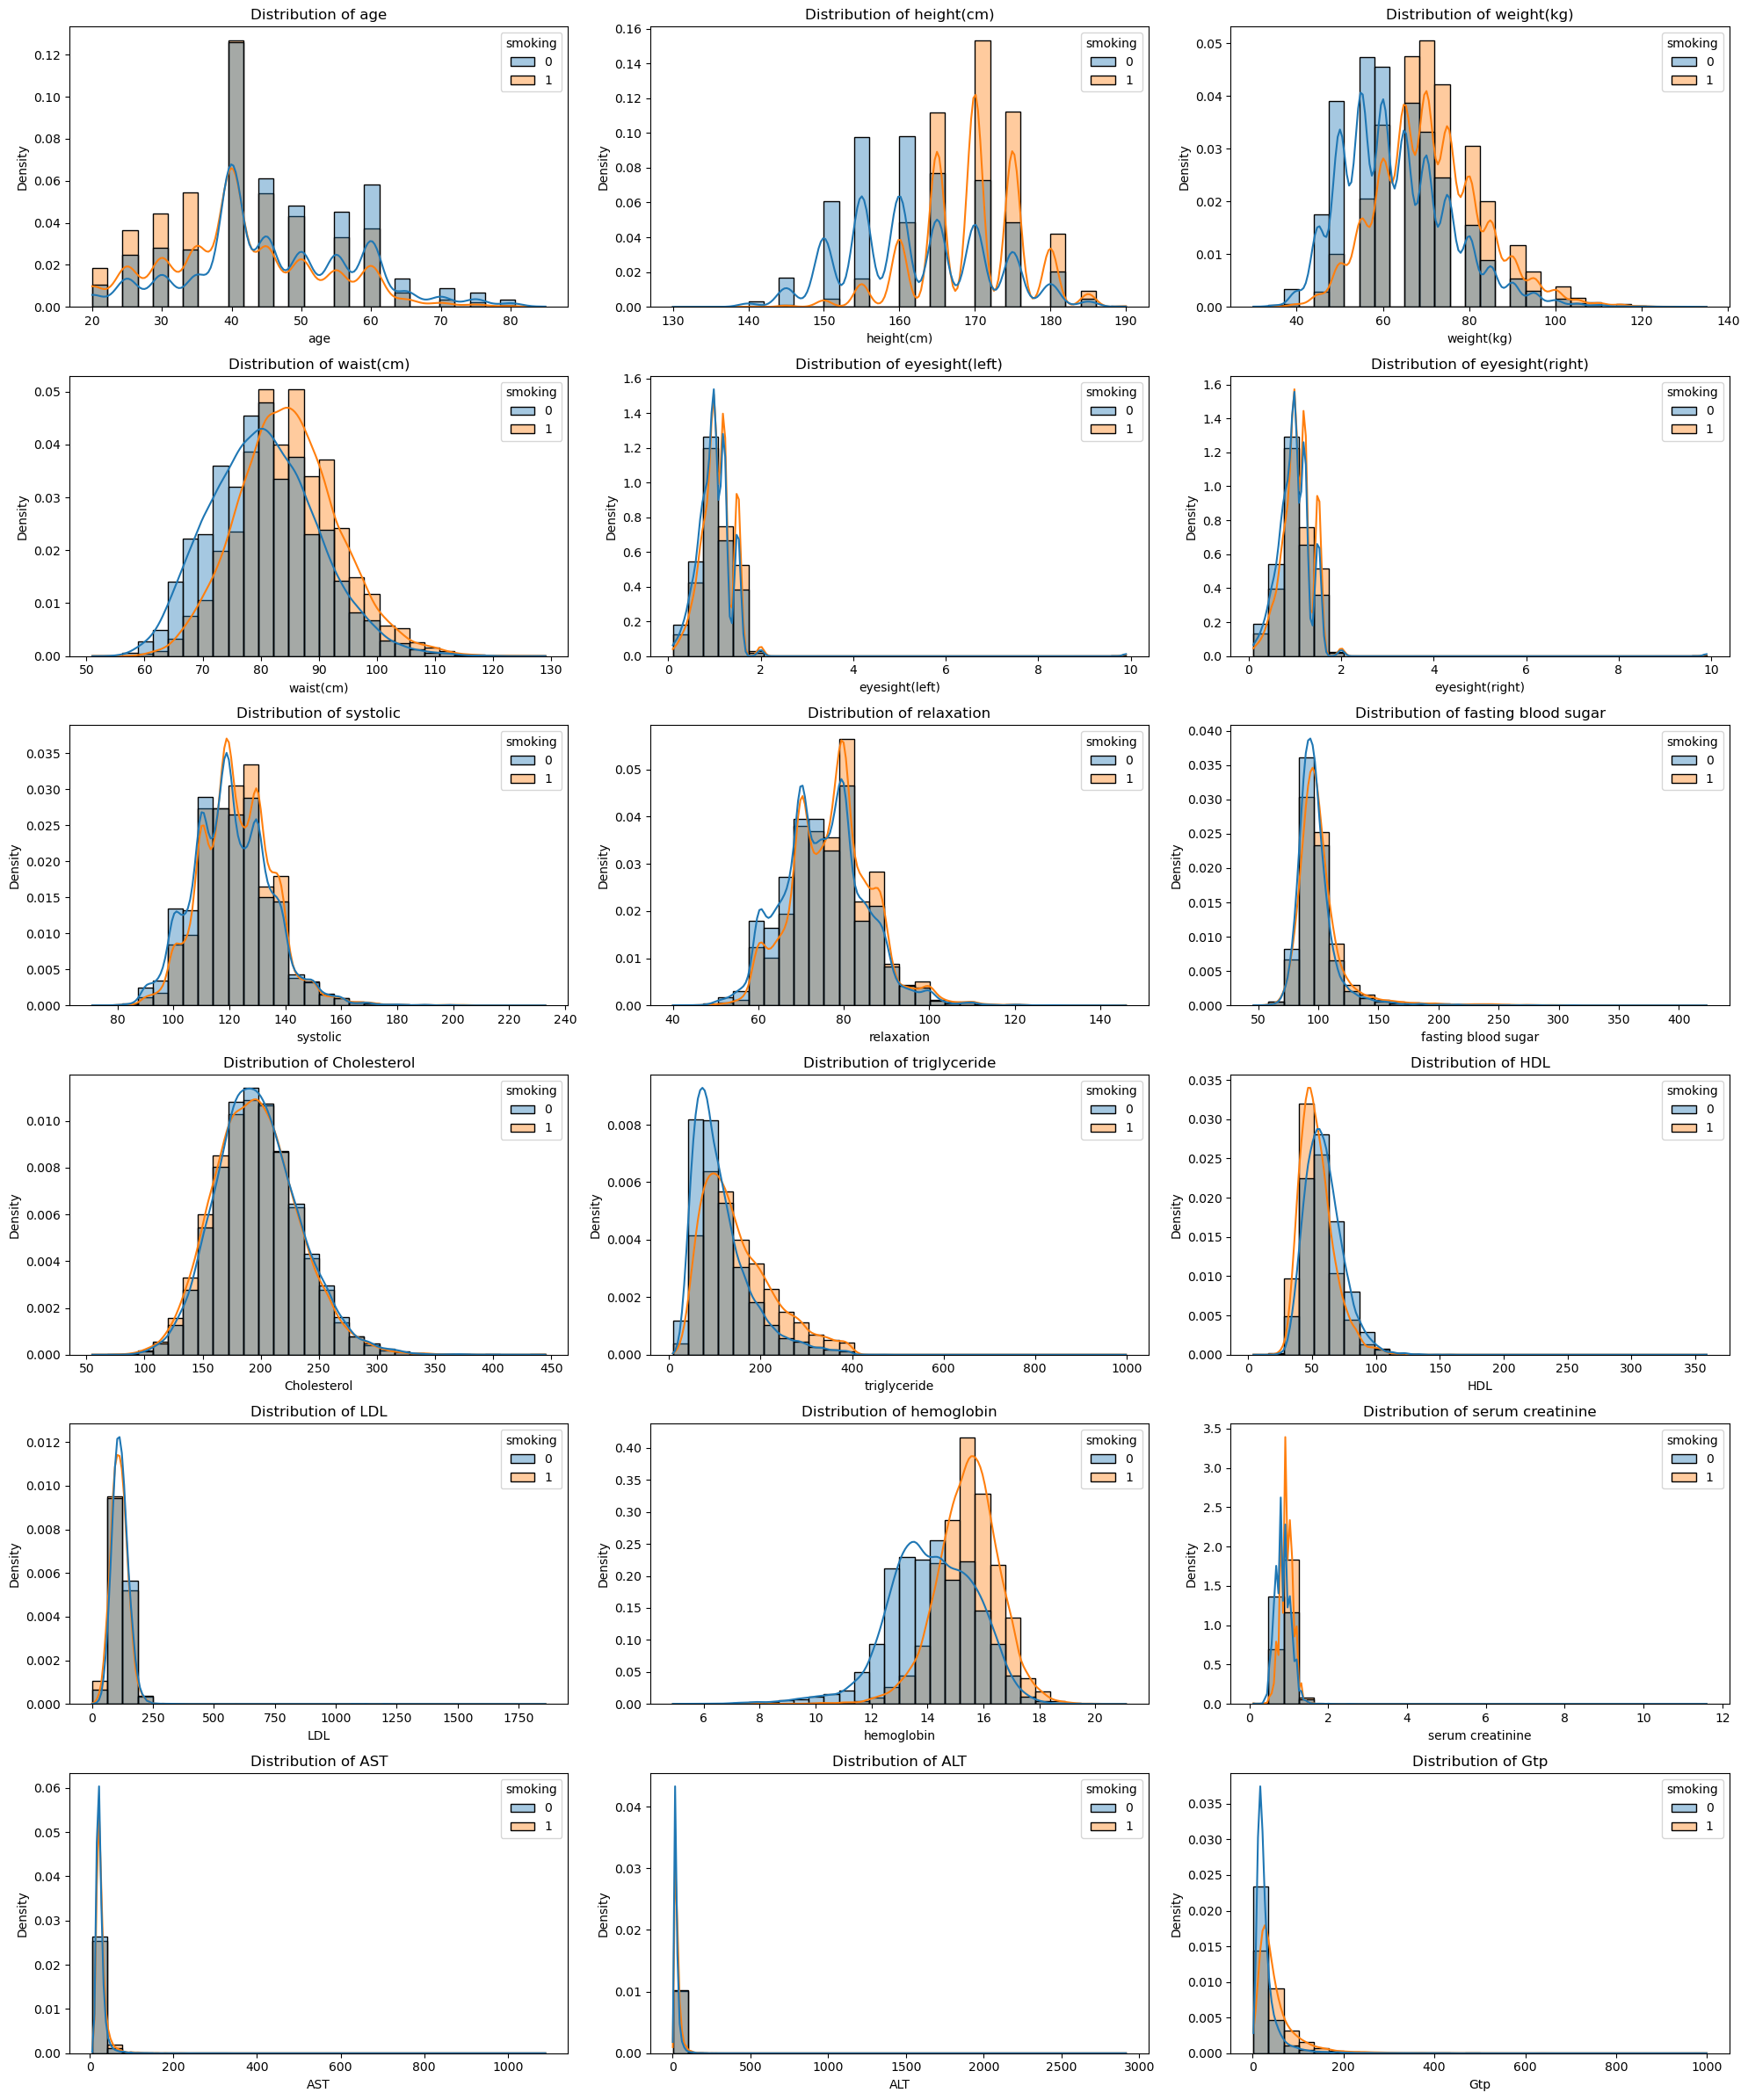

In [12]:
n = len(numerical)
cols = 3
rows = math.ceil(n / cols)
plt.figure(figsize=(20, rows * 4))

for i, col in enumerate(numerical, 1):
    plt.subplot(rows, cols, i)
    
    sns.histplot(
        data=data,
        x=col,
        hue='smoking',
        kde=True,
        stat='density',
        common_norm=False,
        bins=30,
        alpha=0.4
    )
    
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

### `Categorical Features distribution`

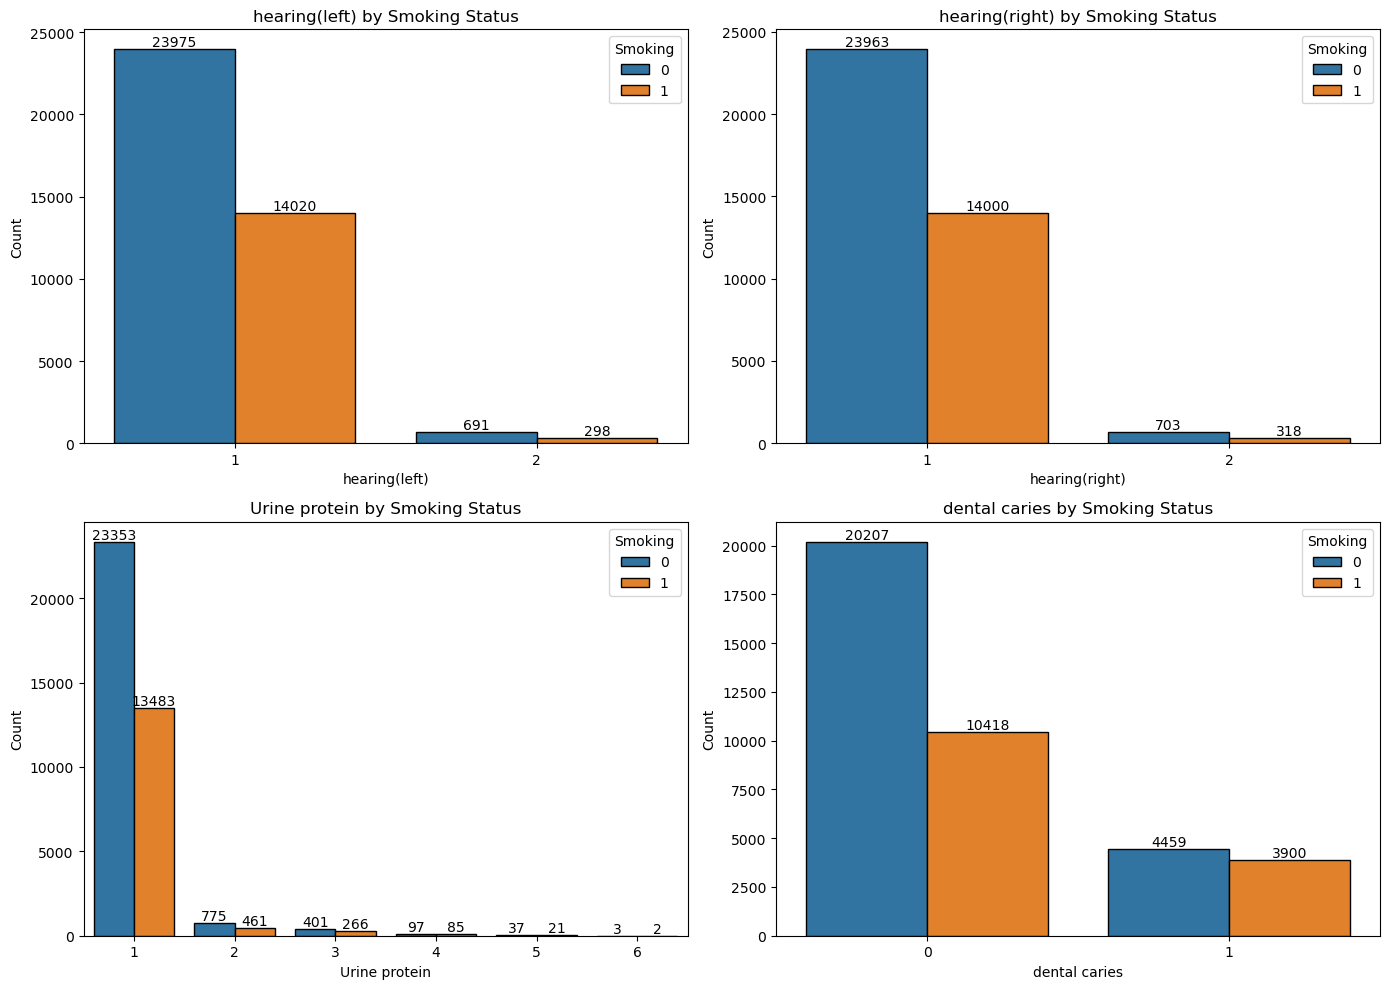

In [13]:
cat_features = [c for c in categorical if c != 'smoking']
n_cat = len(cat_features)
n_cols = 2
n_rows = math.ceil(n_cat / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(7*n_cols, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_features):
    ax = axes[i]

    sns.countplot(
        data=data,
        x=col,
        hue='smoking',
        ax=ax,
        edgecolor='black',
        linewidth=1)

    ax.set_title(f'{col} by Smoking Status')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.legend(title='Smoking')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(
            str(height),
            (p.get_x() + p.get_width() / 2., height),
            ha='center',
            va='bottom',
            fontsize=10)
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### `Numerical Features Vs Target Variable Box Plot`

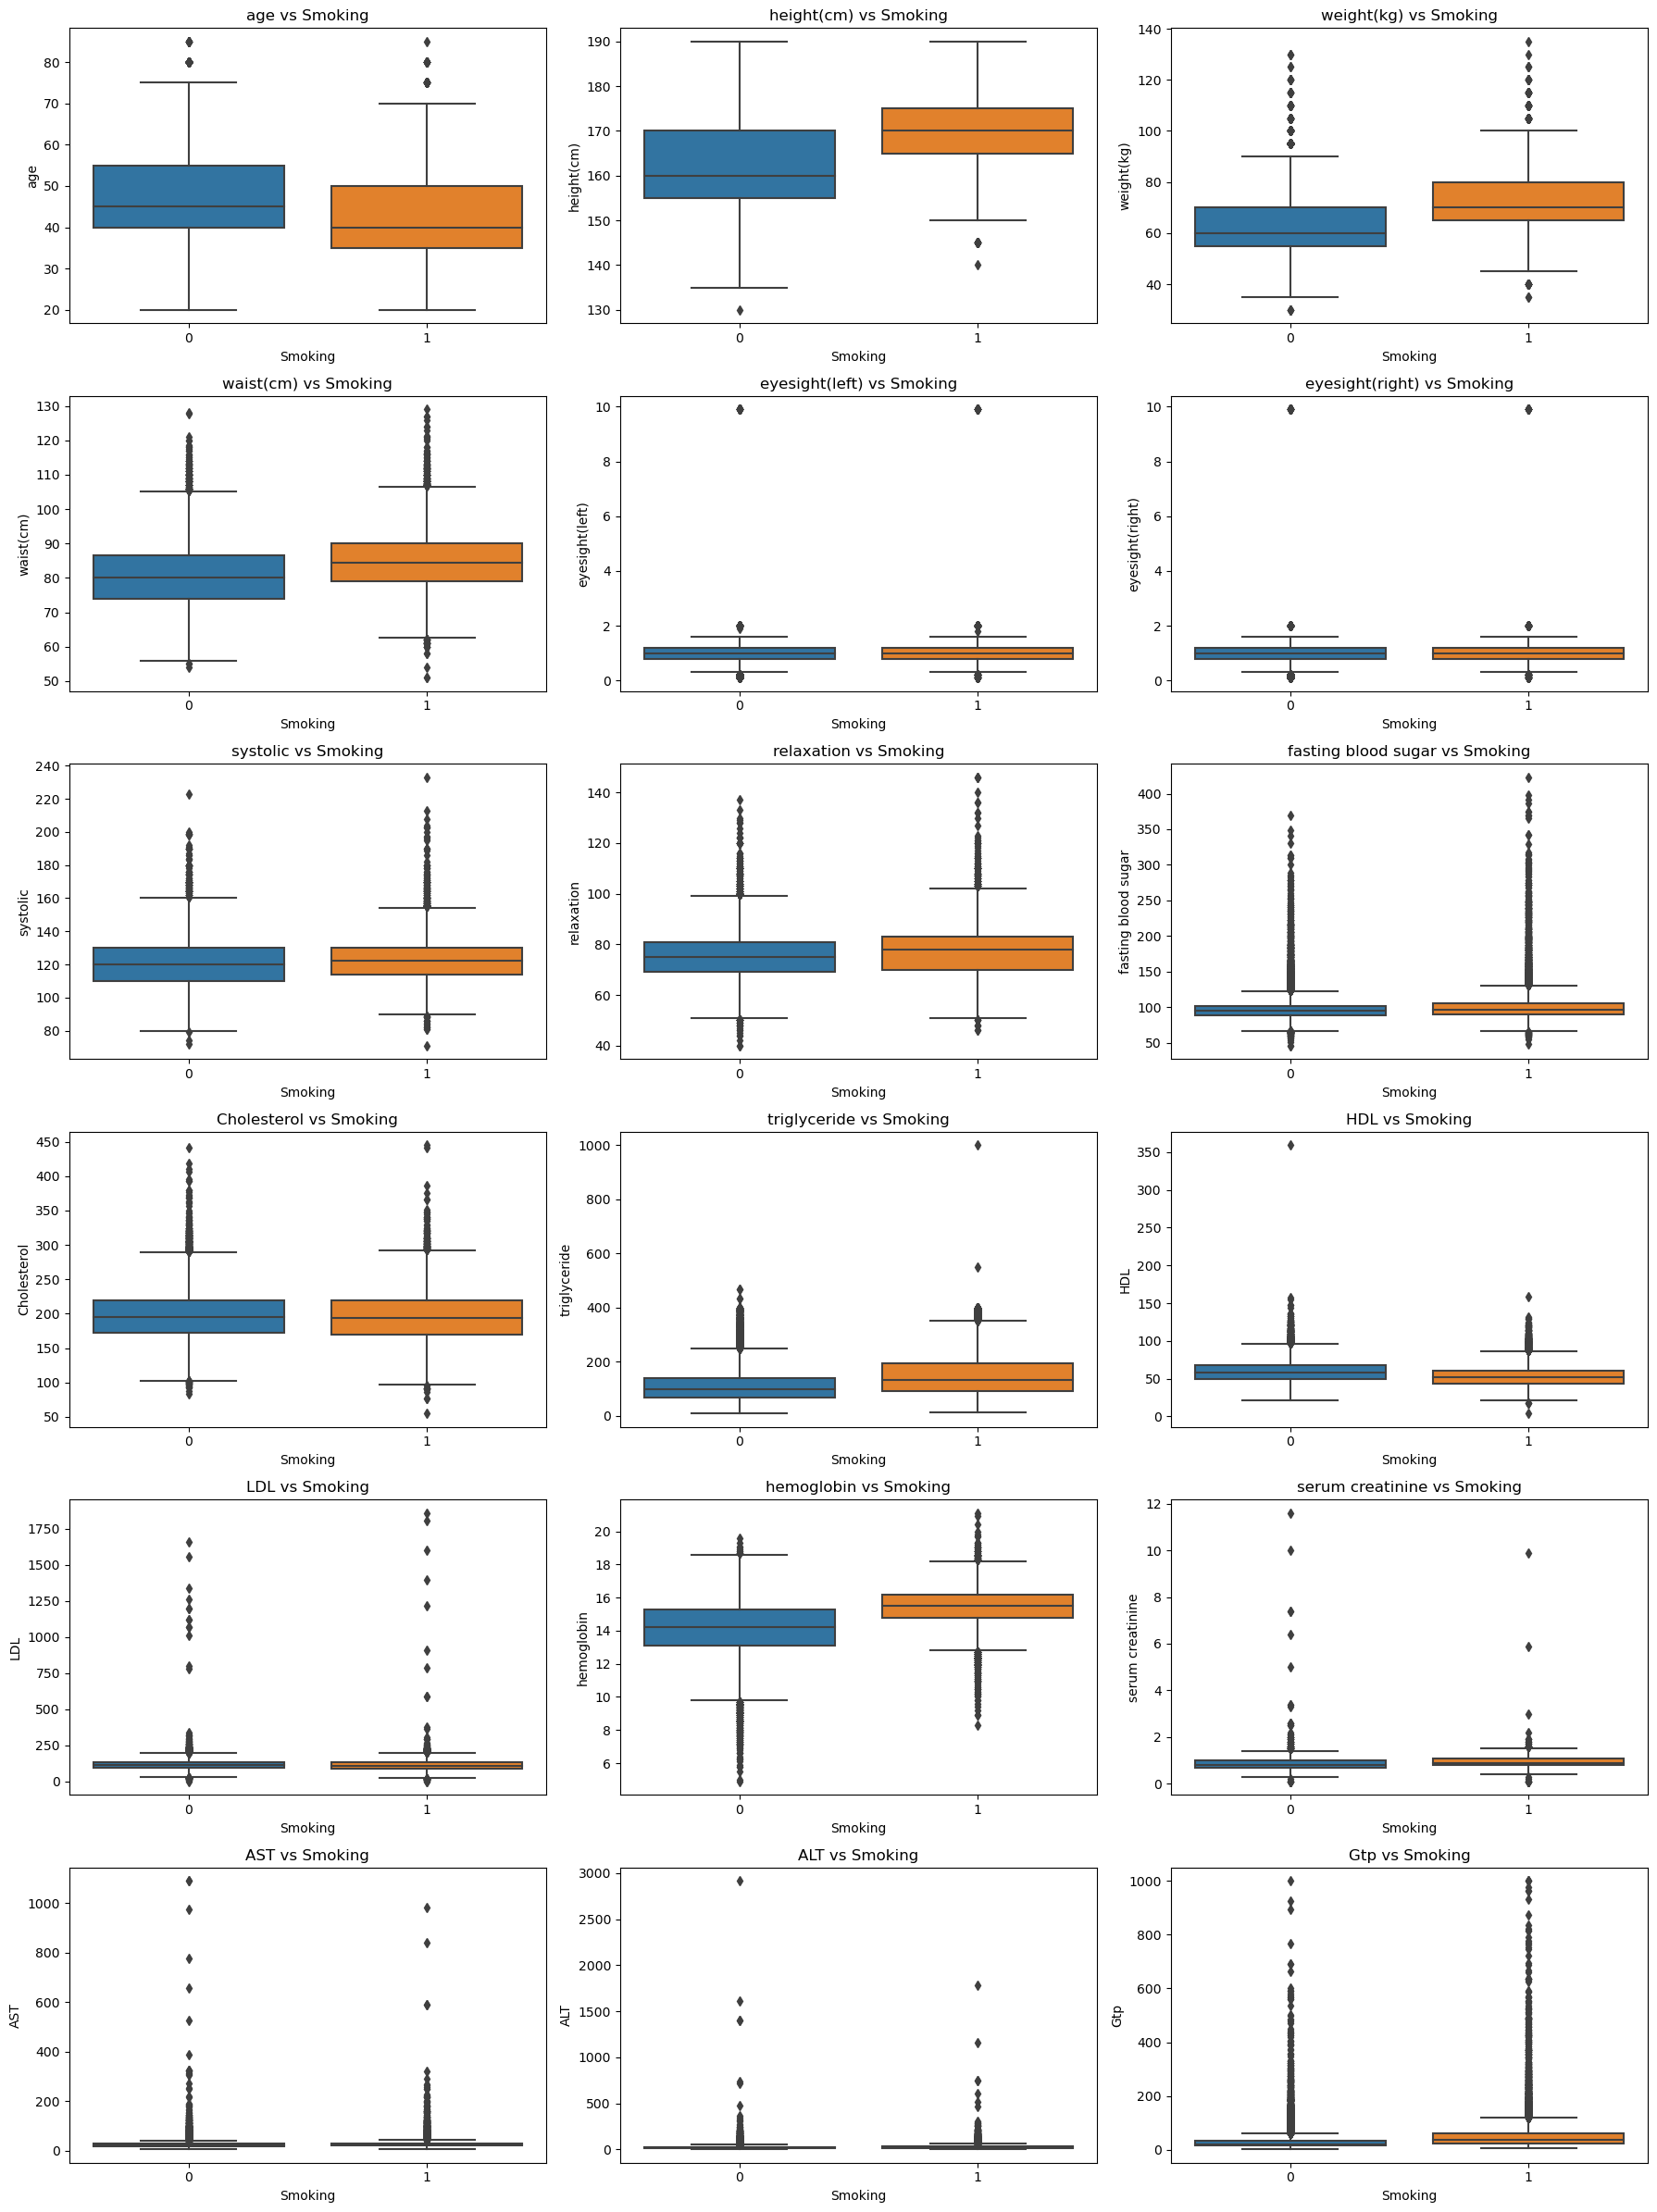

In [14]:
n = len(numerical)
cols = 3
rows = math.ceil(n / cols)
plt.figure(figsize=(18, rows * 4))
for i, col in enumerate(numerical, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=data, x='smoking', y=col)
    plt.title(f"{col} vs Smoking")
    plt.xlabel("Smoking")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### `Outlier detection using Inter Quartile Range (IQR)`

In [15]:
outlier_counts = {}
for col in numerical:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_counts[col] = len(outliers)
outlier_counts

{'age': 211,
 'height(cm)': 177,
 'weight(kg)': 146,
 'waist(cm)': 377,
 'eyesight(left)': 921,
 'eyesight(right)': 950,
 'systolic': 465,
 'relaxation': 498,
 'fasting blood sugar': 2316,
 'Cholesterol': 512,
 'triglyceride': 1607,
 'HDL': 707,
 'LDL': 441,
 'hemoglobin': 484,
 'serum creatinine': 2189,
 'AST': 2111,
 'ALT': 2642,
 'Gtp': 3375}

`This is the outliers count of each numerical features`

### `Winsorization`

In [16]:
for col in numerical:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower, upper)

In [17]:
outlier_counts1 = {}
for col in numerical:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_counts1[col] = len(outliers)
outlier_counts1

{'age': 0,
 'height(cm)': 0,
 'weight(kg)': 0,
 'waist(cm)': 0,
 'eyesight(left)': 0,
 'eyesight(right)': 0,
 'systolic': 0,
 'relaxation': 0,
 'fasting blood sugar': 0,
 'Cholesterol': 0,
 'triglyceride': 0,
 'HDL': 0,
 'LDL': 0,
 'hemoglobin': 0,
 'serum creatinine': 0,
 'AST': 0,
 'ALT': 0,
 'Gtp': 0}

### `Chi-Square Test for Categorical Features`

In [18]:
from scipy.stats import chi2_contingency
for col in cat_features:
    table = pd.crosstab(data[col], data['smoking'])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"Feature: {col}")
    print("Chi-square:", chi2)
    print("p-value:", p)
    print("Degrees of freedom:", dof)
    print("\n")

Feature: hearing(left)
Chi-square: 18.71047759243894
p-value: 1.5214418715754425e-05
Degrees of freedom: 1


Feature: hearing(right)
Chi-square: 13.81216472710913
p-value: 0.00020202395358092282
Degrees of freedom: 1


Feature: Urine protein
Chi-square: 11.095905085040188
p-value: 0.049511278397280714
Degrees of freedom: 5


Feature: dental caries
Chi-square: 450.8087198531697
p-value: 4.809679216057804e-100
Degrees of freedom: 1




`Chi-square tests indicate that hearing(left/right), urine protein, and dental caries all show statistically significant associations with smoking status, with dental caries exhibiting the strongest relationship.`


### `Correlation Coefficient Matrix`

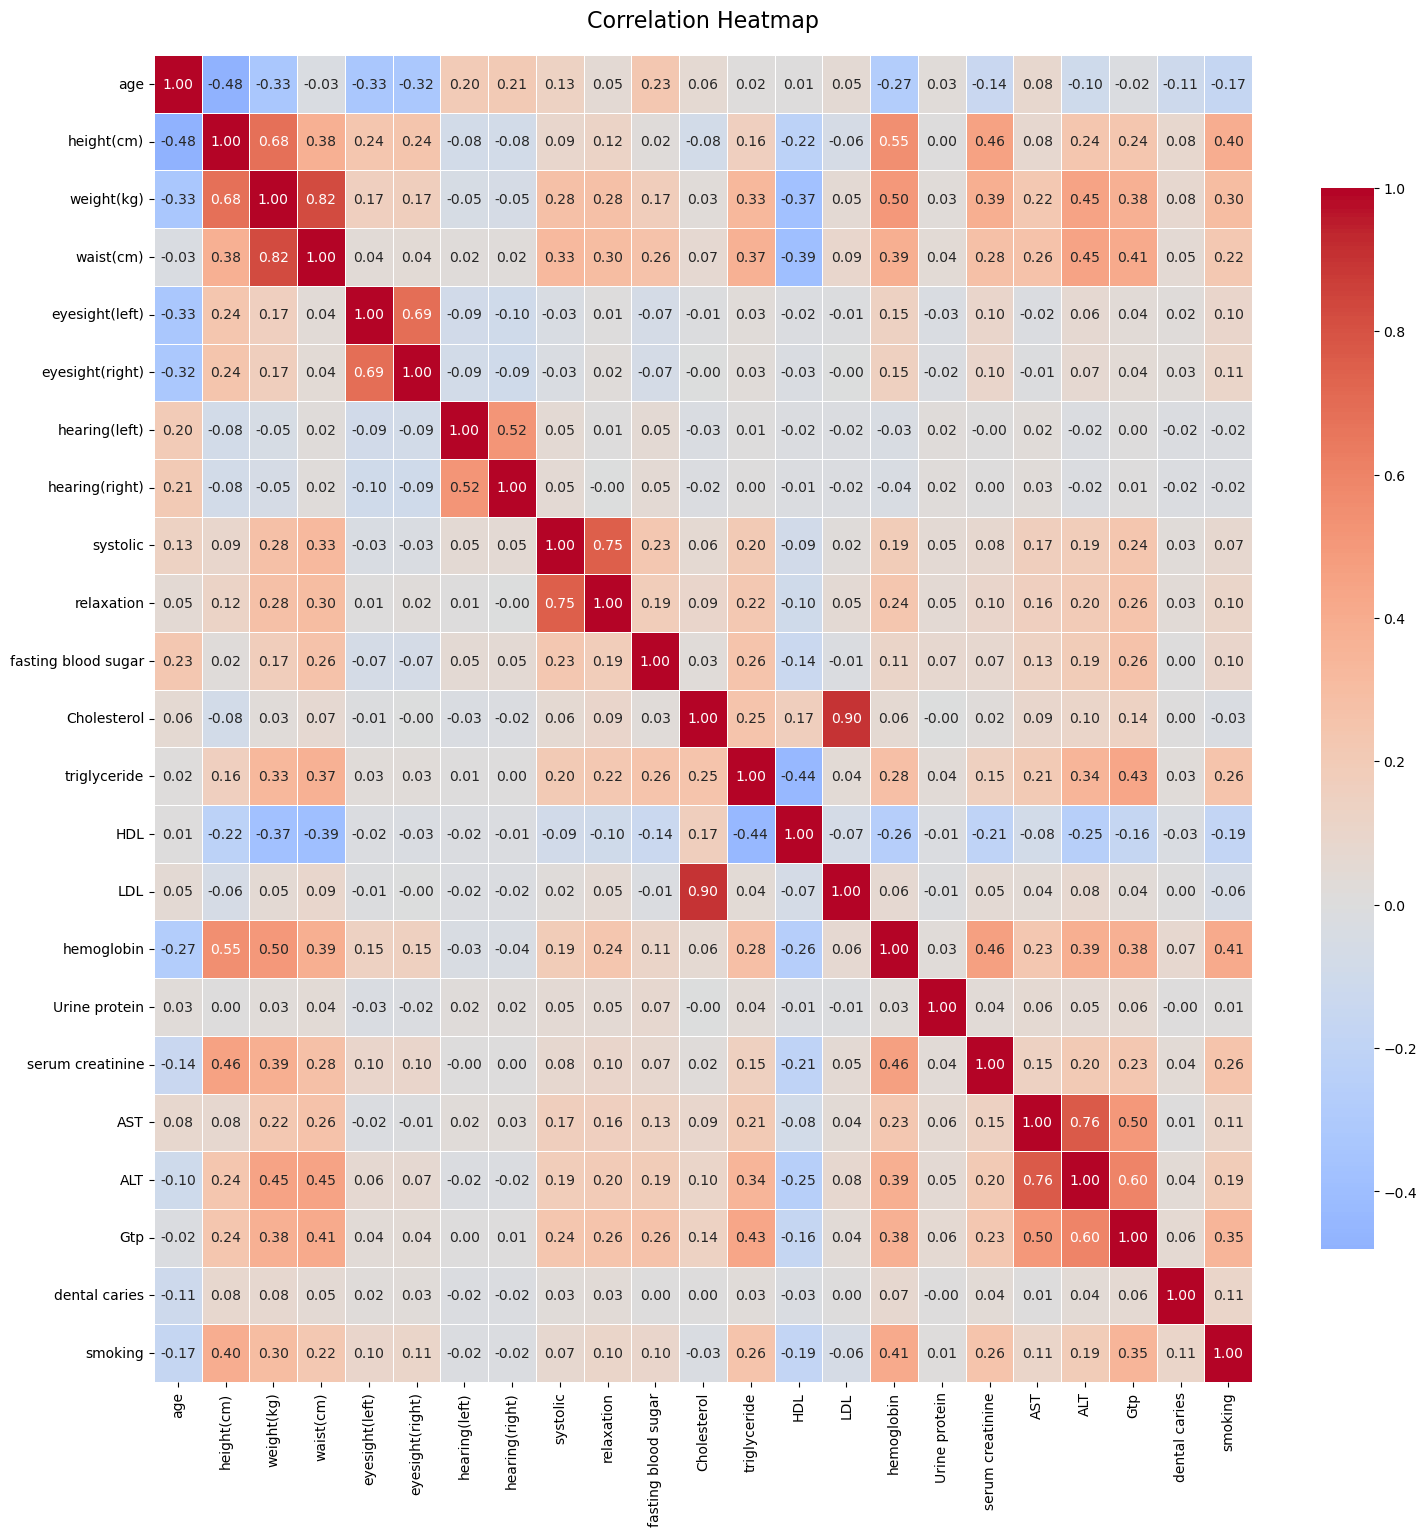

In [19]:
plt.figure(figsize=(16, 16))
sns.heatmap(
    data.corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap", fontsize=16, pad=20)

plt.tight_layout(pad=3.0)
plt.show()

### `Model Development`

In [20]:
X = data.drop(columns=['smoking'])
y = data['smoking']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### `Logistic Regression`

In [23]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7296396049762729
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      4933
           1       0.64      0.59      0.62      2864

    accuracy                           0.73      7797
   macro avg       0.71      0.70      0.70      7797
weighted avg       0.73      0.73      0.73      7797



In [26]:
print("Weights:", log_reg.coef_[0])
print("Bias:", log_reg.intercept_[0])

Weights: [-6.09802432e-05  8.42695312e-01 -5.01203666e-01  1.22852457e-01
 -1.06025576e-02  5.61472606e-02 -9.76365740e-02  1.81111713e-01
 -1.90588114e-01  2.48356891e-02  9.07236287e-02 -5.23267265e-02
  2.80847110e-01 -1.85577695e-01 -1.65132500e-01  9.33117764e-01
 -6.08514218e-02  5.13269602e-02 -8.24755007e-02 -2.81583804e-01
  7.39618990e-01  3.90549212e-01]
Bias: -0.9246591643482955


`The Weights and the Bias of the Logistic Regression`

### `Support Vector Machine (SVM)`

In [34]:
svm_clf = SVC(kernel='rbf', C=1, gamma=0.1)
svm_clf.fit(X_train_scaled, y_train)

y_pred_svm = svm_clf.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7588816211363345
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      4933
           1       0.67      0.67      0.67      2864

    accuracy                           0.76      7797
   macro avg       0.74      0.74      0.74      7797
weighted avg       0.76      0.76      0.76      7797



In [ ]:
svm_clf3 = SVC(kernel='rbf', C=1.5, gamma=0.5)
svm_clf3.fit(X_train_scaled, y_train)

y_pred_svm3 = svm_clf3.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm3))
print(classification_report(y_test, y_pred_svm3))

SVM Accuracy: 0.7796588431447993
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      4933
           1       0.72      0.65      0.69      2864

    accuracy                           0.78      7797
   macro avg       0.76      0.75      0.76      7797
weighted avg       0.78      0.78      0.78      7797



`Best Performing Support Vector Machine(SVM)` `with` `Kernel - Radial Basis Function`, `Regularization Parameter (C) - 1.5` `&` `Gamma - 0.5` 

In [38]:
svm_clf4 = SVC(kernel='rbf', C=1.31, gamma=0.8)
svm_clf4.fit(X_train_scaled, y_train)

y_pred_svm4 = svm_clf4.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm4))
print(classification_report(y_test, y_pred_svm4))

SVM Accuracy: 0.7685007053995127
              precision    recall  f1-score   support

           0       0.77      0.89      0.83      4933
           1       0.75      0.55      0.64      2864

    accuracy                           0.77      7797
   macro avg       0.76      0.72      0.73      7797
weighted avg       0.77      0.77      0.76      7797



### `Neural Network`

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [29]:
X_train_np = np.array(X_train_scaled, dtype=np.float32)
X_test_np  = np.array(X_test_scaled, dtype=np.float32)

y_train_np = np.array(y_train, dtype=np.float32)
y_test_np  = np.array(y_test, dtype=np.float32)

X_train_tensor = torch.from_numpy(X_train_np)
X_test_tensor  = torch.from_numpy(X_test_np)

y_train_tensor = torch.from_numpy(y_train_np).unsqueeze(1)
y_test_tensor  = torch.from_numpy(y_test_np).unsqueeze(1)

In [30]:
batch_size = 256

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset  = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)

In [40]:
input_dim = X_train_np.shape[1]

def get_activation(name: str):
    name = name.lower()
    if name == "relu":
        return nn.ReLU()
    elif name == "tanh":
        return nn.Tanh()
    elif name == "sigmoid":
        return nn.Sigmoid()
    else:
        raise ValueError(f"Unknown activation: {name}")

class DeepSmokerNet(nn.Module):
    def __init__(self, input_dim, activation="relu"):
        super().__init__()
        act = get_activation(activation)

        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            act,
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),

            nn.Linear(256, 128),
            act,
            nn.BatchNorm1d(128),
            nn.Dropout(0.2),

            nn.Linear(128, 64),
            act,
            nn.BatchNorm1d(64),
            nn.Dropout(0.1),

            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)


In [41]:
criterion = nn.BCEWithLogitsLoss()

def train_one_model(activation, lr, weight_decay, num_epochs=25):
    model = DeepSmokerNet(input_dim, activation=activation).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    best_val_acc = 0.0

    for epoch in range(1, num_epochs + 1):
        model.train()
        train_loss, correct, total = 0.0, 0, 0

        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            logits = model(X_batch)
            loss = criterion(logits, y_batch)

            loss.backward()
            optimizer.step()

            train_loss += loss.item() * X_batch.size(0)
            preds = (torch.sigmoid(logits) >= 0.5).float()
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)

        train_loss /= total
        train_acc = correct / total

        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                logits = model(X_batch)
                loss = criterion(logits, y_batch)

                val_loss += loss.item() * X_batch.size(0)
                preds = (torch.sigmoid(logits) >= 0.5).float()
                val_correct += (preds == y_batch).sum().item()
                val_total += y_batch.size(0)

        val_loss /= val_total
        val_acc = val_correct / val_total

        if val_acc > best_val_acc:
            best_val_acc = val_acc

        print(
            f"[{activation} | lr={lr} | wd={weight_decay}] "
            f"Epoch {epoch:02d} | Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} "
            f"| Val Loss: {val_loss:.4f} Acc: {val_acc:.4f} "
            f"| Best Val Acc: {best_val_acc:.4f}"
        )

    model.eval()
    final_correct, final_total = 0, 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            logits = model(X_batch)
            preds = (torch.sigmoid(logits) >= 0.5).float()
            final_correct += (preds == y_batch).sum().item()
            final_total += y_batch.size(0)

    final_acc = final_correct / final_total
    print(f"FINAL [{activation} | lr={lr} | wd={weight_decay}] Test Acc: {final_acc:.4f}")

    return best_val_acc

activations = ["sigmoid","relu", "tanh"]
learning_rates = [1e-2, 5e-3, 1e-3, 5e-4]
weight_decays = [0.0, 1e-4, 1e-3]

results = {}

for act in activations:
    for lr in learning_rates:
        for wd in weight_decays:
            print("=" * 80)
            print(f"Training with activation={act}, lr={lr}, weight_decay={wd}")
            max_val_acc = train_one_model(act, lr, wd, num_epochs=25)
            results[(act, lr, wd)] = max_val_acc

print("\nSummary (sorted by MAX Val Accuracy):")
for (act, lr, wd), acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"Act={act:5s} | lr={lr:.0e} | wd={wd:.0e} -> Max Val Acc={acc:.4f}")

Training with activation=sigmoid, lr=0.01, weight_decay=0.0
[sigmoid | lr=0.01 | wd=0.0] Epoch 01 | Train Loss: 0.5085 Acc: 0.7321 | Val Loss: 0.4926 Acc: 0.7364 | Best Val Acc: 0.7364
[sigmoid | lr=0.01 | wd=0.0] Epoch 02 | Train Loss: 0.4851 Acc: 0.7453 | Val Loss: 0.4857 Acc: 0.7466 | Best Val Acc: 0.7466
[sigmoid | lr=0.01 | wd=0.0] Epoch 03 | Train Loss: 0.4828 Acc: 0.7463 | Val Loss: 0.4831 Acc: 0.7466 | Best Val Acc: 0.7466
[sigmoid | lr=0.01 | wd=0.0] Epoch 04 | Train Loss: 0.4796 Acc: 0.7477 | Val Loss: 0.4844 Acc: 0.7462 | Best Val Acc: 0.7466
[sigmoid | lr=0.01 | wd=0.0] Epoch 05 | Train Loss: 0.4787 Acc: 0.7466 | Val Loss: 0.4827 Acc: 0.7491 | Best Val Acc: 0.7491
[sigmoid | lr=0.01 | wd=0.0] Epoch 06 | Train Loss: 0.4772 Acc: 0.7537 | Val Loss: 0.4826 Acc: 0.7471 | Best Val Acc: 0.7491
[sigmoid | lr=0.01 | wd=0.0] Epoch 07 | Train Loss: 0.4742 Acc: 0.7527 | Val Loss: 0.4789 Acc: 0.7470 | Best Val Acc: 0.7491
[sigmoid | lr=0.01 | wd=0.0] Epoch 08 | Train Loss: 0.4734 Acc: 0

`Best Performing neural network with Accuracy` `0.7648` `->` `Activation - ReLU`, `Learning Rate - 0.001` `&` `Weight Decay(L2 Regularization) - 0.0001`